<a href="https://colab.research.google.com/github/rasyadtanzilur/pengolahancitra/blob/main/Minggu2_pengolahan_citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

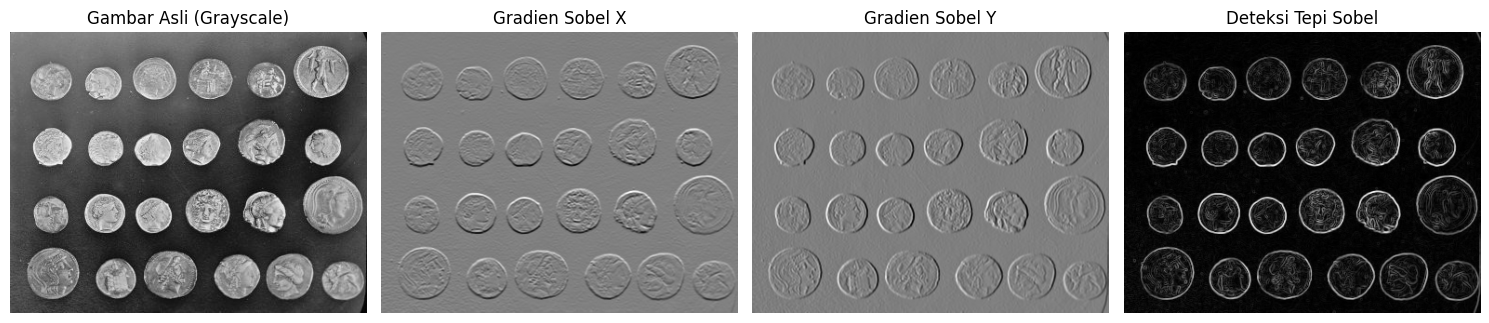

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, img_as_float

# Ambil gambar bawaan dari skimage
image = data.coins()  # Gambar koin bawaan, grayscale (uint8)

# Konversi ke float grayscale jika perlu (agar kompatibel)
gray_image = img_as_float(image)

# Hitung gradien menggunakan Operator Sobel
sobel_x = filters.sobel_h(gray_image)  # Sobel di arah horizontal
sobel_y = filters.sobel_v(gray_image)  # Sobel di arah vertikal
sobel_edge = filters.sobel(gray_image)  # Kombinasi kedua arah

# Visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title("Gradien Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title("Gradien Sobel Y")
ax[2].axis("off")

ax[3].imshow(sobel_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Sobel")
ax[3].axis("off")

plt.tight_layout()
plt.show()


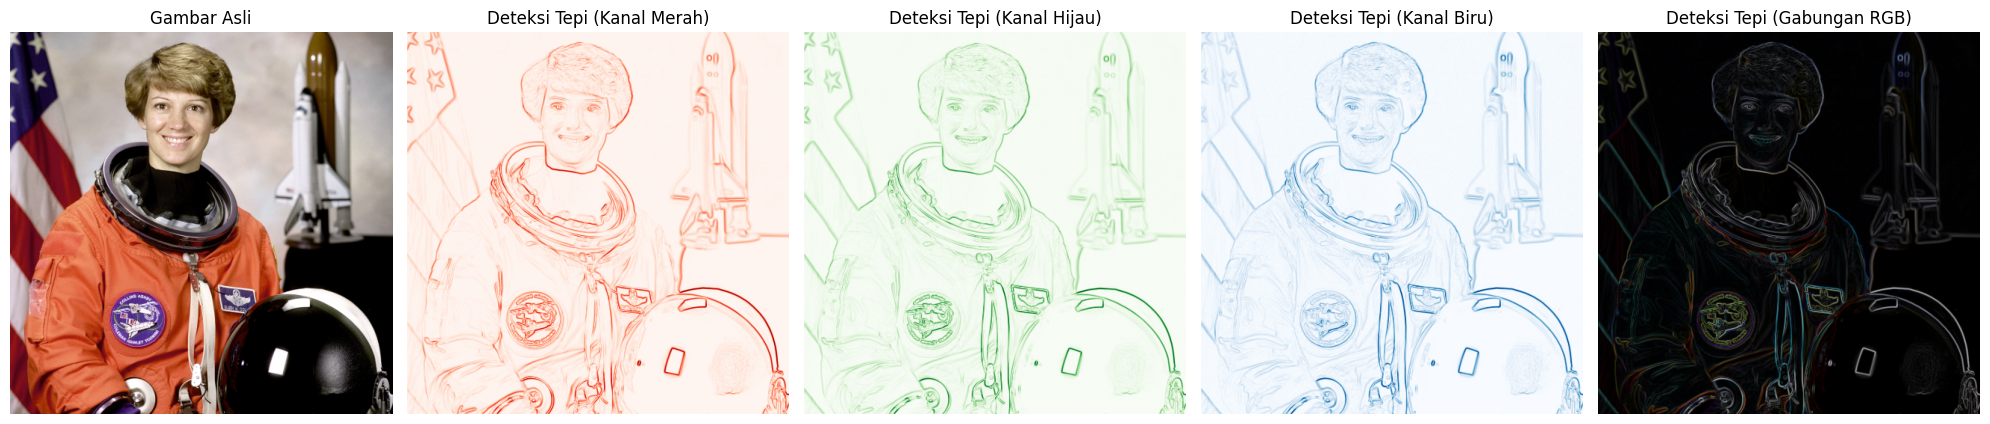

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage (gambar astronaut berwarna)
image = data.astronaut()

# Pisahkan kanal warna
red_channel = image[:, :, 0]  # Kanal merah
green_channel = image[:, :, 1]  # Kanal hijau
blue_channel = image[:, :, 2]  # Kanal biru

# Terapkan Operator Sobel pada masing-masing kanal warna
sobel_red = filters.sobel(red_channel)
sobel_green = filters.sobel(green_channel)
sobel_blue = filters.sobel(blue_channel)

# Gabungkan hasil dengan mengambil rata-rata dari ketiga kanal
sobel_color = np.stack((sobel_red, sobel_green, sobel_blue), axis=2)
sobel_color = np.clip(sobel_color, 0, 1)  # Normalisasi nilai agar tetap valid

# Visualisasi hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

# Change 'reds' to 'Reds' to use the correct colormap name
ax[1].imshow(sobel_red, cmap='Reds')
ax[1].set_title("Deteksi Tepi (Kanal Merah)")
ax[1].axis("off")

# Change 'greens' to 'Greens' to use the correct colormap name
ax[2].imshow(sobel_green, cmap='Greens')
ax[2].set_title("Deteksi Tepi (Kanal Hijau)")
ax[2].axis("off")

# Change 'blues' to 'Blues' to use the correct colormap name
ax[3].imshow(sobel_blue, cmap='Blues')
ax[3].set_title("Deteksi Tepi (Kanal Biru)")
ax[3].axis("off")

ax[4].imshow(sobel_color)
ax[4].set_title("Deteksi Tepi (Gabungan RGB)")
ax[4].axis("off")

plt.tight_layout()
plt.show()

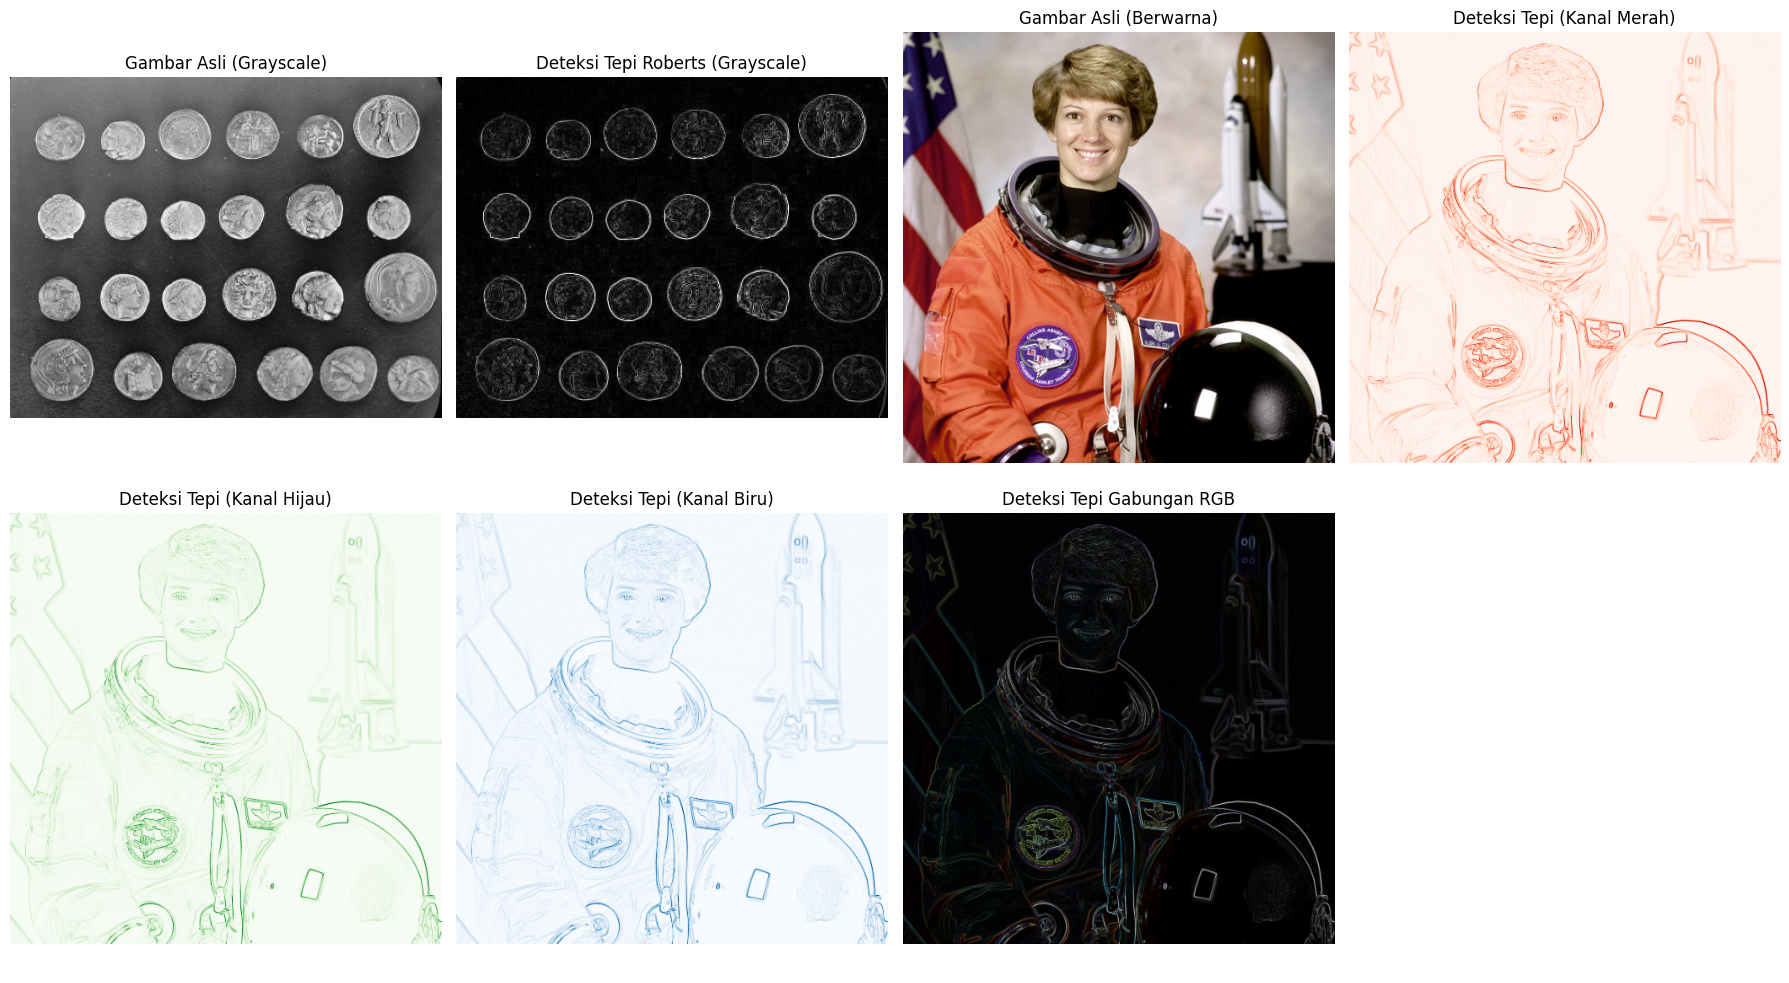

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# ===================== 1⃣ DETEKSI TEPI ROBERTS PADA CITRA GRAYSCALE =====================

# Ambil gambar grayscale dari skimage
image_gray = data.coins()  # Menggunakan gambar koin (grayscale)

# Terapkan Operator Roberts
roberts_gray = filters.roberts(image_gray)

# ===================== 2⃣ DETEKSI TEPI ROBERTS PADA CITRA BERWARNA =====================

# Ambil gambar berwarna dari skimage
image_color = data.astronaut()  # Menggunakan gambar astronaut (berwarna)

# Pisahkan kanal warna (R, G, B)
red_channel = image_color[:, :, 0]  # Kanal merah
green_channel = image_color[:, :, 1]  # Kanal hijau
blue_channel = image_color[:, :, 2]  # Kanal biru

# Terapkan Operator Roberts pada masing-masing kanal warna
roberts_red = filters.roberts(red_channel)
roberts_green = filters.roberts(green_channel)
roberts_blue = filters.roberts(blue_channel)

# Gabungkan hasil deteksi tepi dari ketiga kanal
roberts_color = np.stack((roberts_red, roberts_green, roberts_blue), axis=2)
roberts_color = np.clip(roberts_color, 0, 1)  # Normalisasi agar dalam rentang 0-1

# ===================== VISUALISASI HASIL =====================

fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Ubah dari 2x5 menjadi 2x4 untuk keseimbangan
ax = axes.ravel()

# -------------------- Baris 1: Citra Grayscale --------------------
ax[0].imshow(image_gray, cmap="gray")
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(roberts_gray, cmap="gray")
ax[1].set_title("Deteksi Tepi Roberts (Grayscale)")
ax[1].axis("off")

# -------------------- Baris 2: Citra Berwarna --------------------
ax[2].imshow(image_color)
ax[2].set_title("Gambar Asli (Berwarna)")
ax[2].axis("off")

ax[3].imshow(roberts_red, cmap="Reds")
ax[3].set_title("Deteksi Tepi (Kanal Merah)")
ax[3].axis("off")

ax[4].imshow(roberts_green, cmap="Greens")
ax[4].set_title("Deteksi Tepi (Kanal Hijau)")
ax[4].axis("off")

ax[5].imshow(roberts_blue, cmap="Blues")
ax[5].set_title("Deteksi Tepi (Kanal Biru)")
ax[5].axis("off")

ax[6].imshow(roberts_color)
ax[6].set_title("Deteksi Tepi Gabungan RGB")
ax[6].axis("off")

# Kosongkan subplot terakhir untuk keseimbangan tata letak
ax[7].axis("off")

plt.tight_layout()
plt.show()


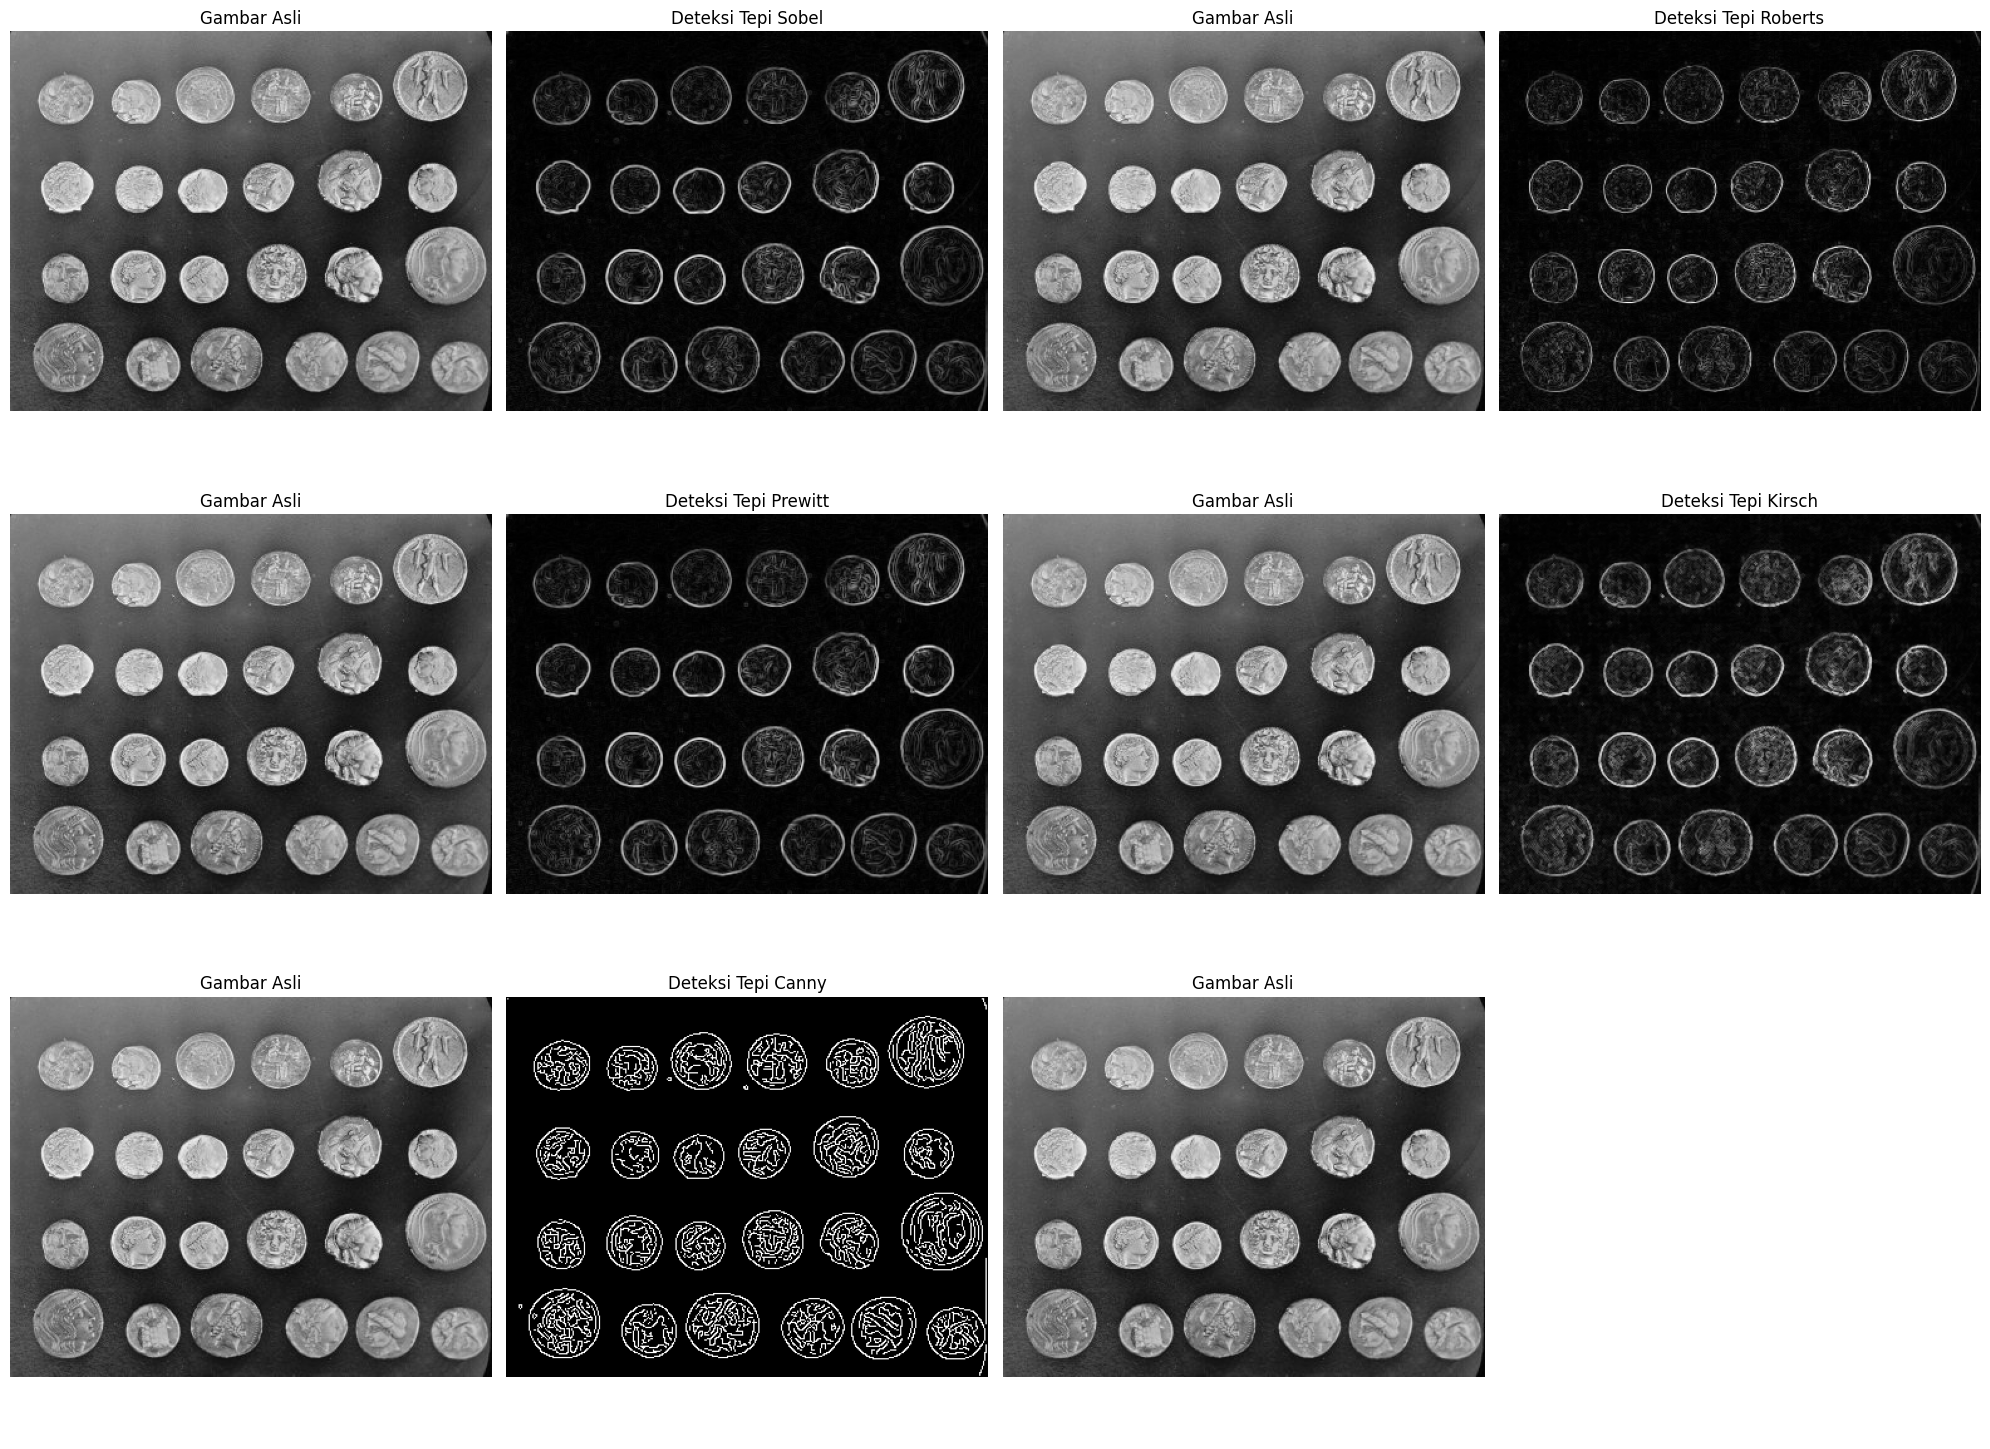

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1 AMBIL GAMBAR GRAYSCALE =====================
# Menggunakan gambar koin dari skimage
image_gray = data.coins()  # Gambar grayscale

# ===================== 2 TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# Operator Sobel
sobel_edge = filters.sobel(image_gray)

# Operator Roberts
roberts_edge = filters.roberts(image_gray)

# Operator Prewitt
prewitt_edge = filters.prewitt(image_gray)

# Operator Kirsch (Menggunakan filter gradien berbasis morfologi)
kirsch_edge = gradient(image_gray, disk(1))

# Operator Canny
canny_edge = feature.canny(image_gray, sigma=1)

# ===================== 3 VISUALISASI HASIL (FORMAT 4 KOLOM, 3 BARIS) =====================

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
ax = axes.ravel()

# Baris 1: Gambar Asli - Sobel
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_edge, cmap='gray')
ax[1].set_title("Deteksi Tepi Sobel")
ax[1].axis("off")

ax[2].imshow(image_gray, cmap='gray')
ax[2].set_title("Gambar Asli")
ax[2].axis("off")

ax[3].imshow(roberts_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Roberts")
ax[3].axis("off")

# Baris 2: Gambar Asli - Prewitt
ax[4].imshow(image_gray, cmap='gray')
ax[4].set_title("Gambar Asli")
ax[4].axis("off")

ax[5].imshow(prewitt_edge, cmap='gray')
ax[5].set_title("Deteksi Tepi Prewitt")
ax[5].axis("off")

ax[6].imshow(image_gray, cmap='gray')
ax[6].set_title("Gambar Asli")
ax[6].axis("off")

ax[7].imshow(kirsch_edge, cmap='gray')
ax[7].set_title("Deteksi Tepi Kirsch")
ax[7].axis("off")

# Baris 3: Gambar Asli - Canny
ax[8].imshow(image_gray, cmap='gray')
ax[8].set_title("Gambar Asli")
ax[8].axis("off")

ax[9].imshow(canny_edge, cmap='gray')
ax[9].set_title("Deteksi Tepi Canny")
ax[9].axis("off")

ax[10].imshow(image_gray, cmap='gray')
ax[10].set_title("Gambar Asli")
ax[10].axis("off")

# Kosongkan posisi terakhir agar tampilan rapi
ax[11].axis("off")

plt.tight_layout()
plt.show()
